# Identification of astronomical objects in the SDSS DR14 catalog

In this exercise we use the k-Nearest Neighbors algorithm to classify astronomical objects into stars, galaxies and quasars in the SDSS DR14 survey. The dataset and the description of the features is available at:

https://www.kaggle.com/lucidlenn/sloan-digital-sky-survey

In order to implement the classifier, we only use the measurements of the telescope in five bands and the redshift of the objects. Here we use the scikit learn library and assess the accuracy of the algorithm in classifying each type of object.

Enjoy!

We load the modules we use

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
#plt.style.use('classic')

import numpy as np
#import numpy
import pandas as pd

from sklearn.model_selection import train_test_split
import sklearn.datasets
from sklearn.neighbors import KNeighborsClassifier

from IPython.display import display

Data cleansing. We load the dataset and keep only the info we are interested in. We replace the target labels using 0,1,2 instead of 'STAR', 'GALAXY' and 'QSO', respectively. We make sure there is no missing information.

In [2]:
sdss = pd.read_csv('Skyserver_SQL2_27_2018_6_51_39_PM.csv',skiprows=1)
sdss = sdss[['u','g','r','i','z','redshift','class']]
sdss = sdss.replace(['STAR','GALAXY','QSO'],[0,1,2])
display(sdss)
print("Is there any NaN?: {}".format(sdss.isnull().any().any()))

,u,g,r,i,z,redshift,class
0,19.47406,17.04240,15.94699,15.50342,15.22531,-0.000009,0
1,18.66280,17.21449,16.67637,16.48922,16.39150,-0.000055,0
2,19.38298,18.19169,17.47428,17.08732,16.80125,0.123111,1
3,17.76536,16.60272,16.16116,15.98233,15.90438,-0.000111,0
4,17.55025,16.26342,16.43869,16.55492,16.61326,0.000590,0
5,19.43133,18.46779,18.16451,18.01475,18.04155,0.000315,0
6,19.38322,17.88995,17.10537,16.66393,16.36955,0.100242,1
7,18.97993,17.84496,17.38022,17.20673,17.07071,0.000315,0
8,17.90616,16.97172,16.67541,16.53776,16.47596,0.000089,0
9,18.67249,17.71375,17.49362,17.28284,17.22644,0.040508,1


Is there any NaN?: False


We create the scikit-learn bunch object. Note that sdss_measurements & sdss_class are numpy arrays

In [3]:
sdss_measurements=sdss.drop('class',axis=1).values
sdss_class=sdss['class'].values

dataset = sklearn.datasets.base.Bunch(data=sdss_measurements,target=sdss_class)
print ("Type of the dataset: {}".format(type(dataset)))
print ("Type of the data: {}".format(type(dataset.data)))
print ("Type of the target: {}".format(type(dataset.target)))

Type of the dataset: <class 'sklearn.utils.Bunch'>
Type of the data: <class 'numpy.ndarray'>
Type of the target: <class 'numpy.ndarray'>


Exploratory analysis. We split the dataset into the training and the test sets. Then we make a matrix plot to check out the data.

X_train shape: (7500, 6)
y_train shape: (7500,)
X_test shape: (2500, 6)
y_test shape: (2500,)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x2af819888080>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x2af81d1d19b0>]], dtype=object)

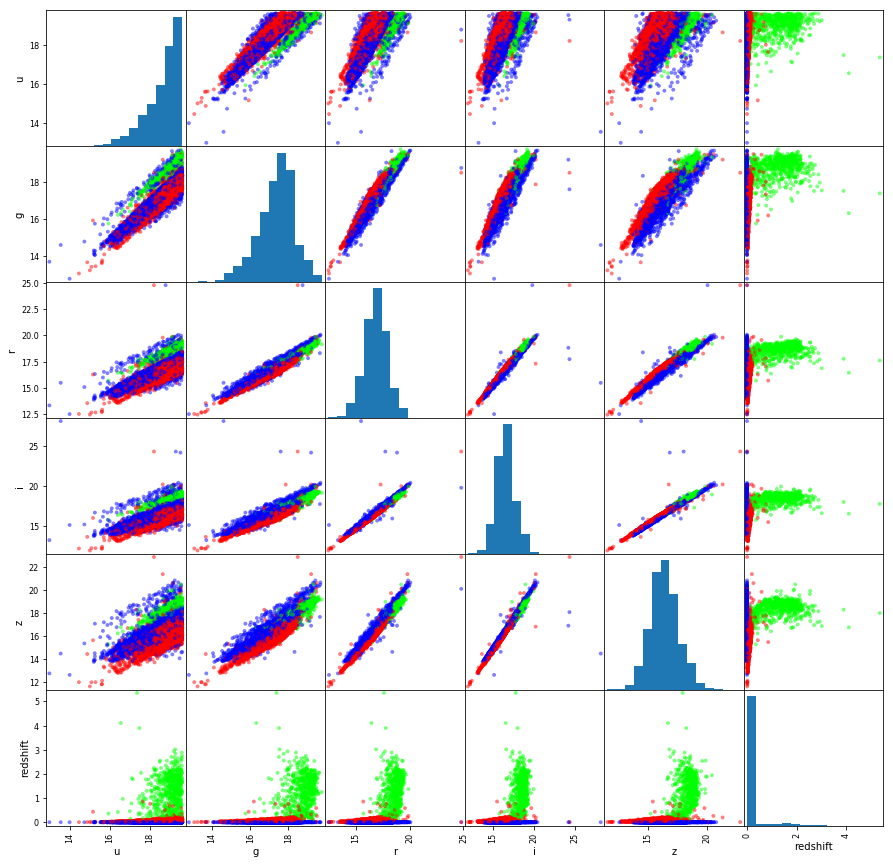

In [4]:
#test_size = 0.25 by default
X_train, X_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size=0.25,random_state=0)
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

#When creating the dataframe of the train set we drop the 'class' column
train_dataframe = pd.DataFrame(X_train, columns=sdss.columns.drop('class'))
pd.plotting.scatter_matrix(train_dataframe, c=y_train, figsize=(15, 15), marker='o',
                           hist_kwds={'bins': 15}, s=15, alpha=.5,cmap=plt.get_cmap('brg'))
#plt.savefig('test.eps')

Here we find the performance of the classifier on the train and test datasets as a function of the number of the nearest neighbors.

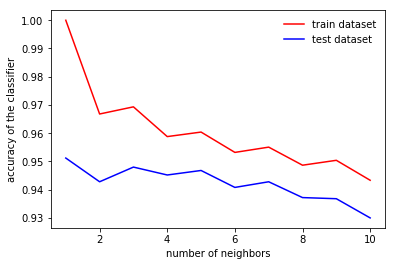

In [5]:
kneigh=list(range(1,11))
score_train = []
score_test  = []

for i in kneigh:
    pc = KNeighborsClassifier(n_neighbors=i)
    pc.fit(X_train, y_train)
    score_train.append(pc.score(X_train,y_train))
    score_test.append(pc.score(X_test,y_test))

#number of neighbors vs accuracy of the classifier plot    
plt.plot(kneigh,score_train,'r',label='train dataset')
plt.plot(kneigh,score_test,'b',label='test dataset')
plt.xlabel('number of neighbors')
plt.ylabel('accuracy of the classifier')
plt.legend(frameon=False)

So far, we have assessed the performance of the classifier on the datasets, but how well our classifier works on identifying each type of object? Here we compute the accuracy given by: $$accuracy=\frac{real}{real+fake},$$ where $real$ is the amount of objects in the testdataset that were correctly classified by the algorithm, and $fake$ are the amount of objects in the dataset that were missclassified by the algorithm. 

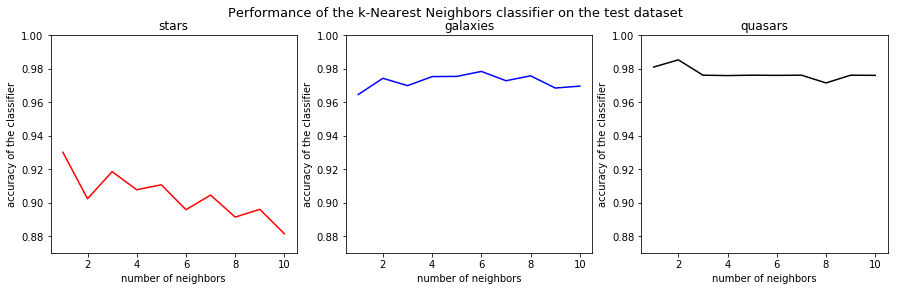

In [6]:
kneigh=list(range(1,11))
accuracy_stars    = []
accuracy_galaxies = []
accuracy_quasars  = []

for i in kneigh:
    pc = KNeighborsClassifier(n_neighbors=i)
    pc.fit(X_train, y_train)
     
    #We compute the predictions of the classifier for the test dataset. We'll compare these predictions against
    #y_test, where we know the true nature of the objects being considered. 
    predictions = pc.predict(X_test)
        
    s_real = 0; g_real = 0; q_real = 0
    s_fake = 0; g_fake = 0; q_fake = 0
    
    #For each value of kNN we compute the total amount of objects correctly(incorrecly) classified by the algorithm
    for j in range(0,len(y_test)):
        if predictions[j] == y_test[j]:
            if predictions[j] == 0:
                s_real += 1
            elif predictions[j] == 1:
                g_real += 1
            else:
                q_real += 1
        else: 
            if predictions[j] == 0:
                s_fake += 1
            elif predictions[j] == 1:
                g_fake += 1
            else: 
                q_fake += 1
            
    accuracy_stars.append(s_real/(s_real+s_fake))
    accuracy_galaxies.append(g_real/(g_real+g_fake))
    accuracy_quasars.append(q_real/(q_real+q_fake))
    

#Plots with the results    
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
fig.suptitle('Performance of the k-Nearest Neighbors classifier on the test dataset',fontsize=13)

#This is another way to set both X and Y axis limits in the subplots to the same range. We have to do this in order to
#not mislead the reader when interpreting the results about in which case the algorithm works the better. 
#for m, subplot in numpy.ndenumerate(axes):
#    subplot.set_xlim(0.5,10.5)
#    subplot.set_ylim(0.87,1)

axes[0].plot(kneigh,accuracy_stars,'-r')
axes[1].plot(kneigh,accuracy_galaxies,'-b')
axes[2].plot(kneigh,accuracy_quasars,'-k')


for aobject, ax in zip(['stars','galaxies','quasars'], axes):
    ax.set_xlim([0.5,10.5])
    ax.set_ylim([0.87,1])    
    ax.set_title("{}".format(aobject))
    ax.set_ylabel("accuracy of the classifier")
    ax.set_xlabel("number of neighbors")
               

fig.subplots_adjust(top=0.88)